# Librerias y Configuraciones

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive"
%cd "My Drive"
%cd "Dead Poets Society"
%cd Mario
%cd DownloadSui/


[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive
[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive
[Errno 2] No such file or directory: 'Dead Poets Society'
/content/drive/My Drive
[Errno 2] No such file or directory: 'Mario'
/content/drive/My Drive
[Errno 2] No such file or directory: 'DownloadSui/'
/content/drive/My Drive


'/content/drive/My Drive'

In [ ]:
%ls

Analisis.ipynb              DataSui_ele_com_096.csv.gz       grafico01.png
chromedriver                DataSui_ele_com_096_Guacari.csv  README.md
chromedriver_linux64.zip    DataSui_ele_com_096_Valle.csv    reporte
chromedriver_linux64.zip.1  DonwnloadSui.ipynb               reporte.crdownload
chromedriver_linux64.zip.2  ele_com_096/


In [ ]:
mkdir ele_com_096
mkdir ele_com_096/Data/

SyntaxError: ignored

In [ ]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/c

In [ ]:
!wget https://chromedriver.storage.googleapis.com/86.0.4240.22/chromedriver_linux64.zip && unzip chromedriver_linux64

In [ ]:
import glob
from bs4 import BeautifulSoup
import os
import time
import datetime
from selenium import webdriver# I need to web scrap in chrome
from selenium.webdriver.support.select import Select # I need to select menu options
from random import randint
import pandas as pd
import numpy as np
from zipfile import ZipFile
pd.set_option('display.max_columns', 100)
print(1)

1


# Funciones

In [ ]:
def TransNum(Texto):
    Salida=Texto.replace(",","")
    return Salida
def leerarchivo(lugar):
    archi=open(lugar)
    temp='we'
    cuadros=""
    while temp != '':#lee todo
        temp=archi.readline()
        cuadros=cuadros+temp
    archi.close()
    return cuadros
def leerColumna(archivo,Sufijo):
    b=leerarchivo(archivo)
    soup=BeautifulSoup(b,'html.parser')
    Columns = []
    temp=[]
    table = soup.find_all('table')
    table_body = table[2].find('thead')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        Columns= ['Age', 'Month', 'Site']+[ele for ele in cols if ele]
        for k in range(7,len(Columns)):
            Columns[k]=Columns[k]+Sufijo    
    return(Columns)
def leerData(archivo,Columns,patron):
        temp2=archivo.replace("./ele_com_096/Data/","").replace(".html","").split("_")
        b=leerarchivo(archivo)
        soup=BeautifulSoup(b,'html.parser')
        data = []
        temp=[]
        table = soup.find_all('table')
        #print(table[2])  
        table_body = table[2].find('tbody')
        rows = table_body.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            temp=[ele for ele in cols if ele]
            
            if 'ND' in set(temp[4:]) and len(set(temp[4:]))>1:
                data.append(temp2[:3]+temp)
        df = pd.DataFrame.from_records(data, columns=Columns)
        for ii in Columns[7:]:
            df[ii]=df[ii].apply(TransNum)
            df[ii]=pd.to_numeric(df[ii], errors='coerce')
        #df.info()
        df=df.drop(columns=['Variable Calculada', 'Total Residencial%s'%(patron),'Total No Residencial%s'%(patron)])
        return(df)
def SetPruebas(Data):
    Data.info()
    Data["Empresa"].value_counts()
def color_negative_red(val):
    if val < 0:
        color = 'red' 
    else:
        color ='black'
    
    return 'color: %s' % color 

def color_significant(val):
    if abs(val) > 0.3:
        color = 'yellow' 
    else:
        color = 'white' 
    return  'background-color: %s' % color 
def initSelenium():
    sistemaop = os.name
    if sistemaop=="posix":
        driver = webdriver.Chrome('./chromedriver')  # Optional argument, if not specified will search path.
    else: 
        driver = webdriver.Chrome('./chromedriver.exe')  # Optional argument, if not specified will search path.
    return driver


# Descarga de datos

In [ ]:
url="http://reportes.sui.gov.co/fabricaReportes/frameSet.jsp?idreporte=ele_com_096"
#initSelenium()
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver =webdriver.Chrome(options=options)



for i in range(0,18):#Counter Age
    time_delay = randint(5,10)
    time.sleep(time_delay)
    driver.get(url)#Goto web
    dheader=driver.find_element_by_xpath("//*[@id='header']")#Search Head
    driver.switch_to.frame(dheader)#Manipulate Head
    inputElementi = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[1]/td[2]/select/option[%s]"%(str(i+1)))
    age=inputElementi.text
    for ii in range(3):
        inputElementii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[3]/td[2]/select/option[%s]"%(str(ii+1)))
        site=inputElementii.text
        for iii in [1,2,3]:
            inputElementiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[7]/td[2]/select/option[%s]"%(str(iii)))
            data=inputElementiii.text
            print(age+"_"+"_"+site+"_"+data)
            for iiii in range(12):
                try:
                    inputElementiiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[2]/td[2]/select/option[%s]"%(str(iiii+1)))
                    month=inputElementiiii.text
                    TEMP=age+"_"+month+"_"+site+"_"+data
                except:
                    continue
                try:
                    if os.path.exists("./ele_com_096/Data/"+TEMP+".html"):
                        print("Existe ./ele_com_096/Data/"+TEMP+".html")
                        time.sleep(1)
                        continue
                    nomonths=["Anual",'Trimestre 1','Trimestre 2','Trimestre 3','Trimestre 4','Semestre 1','Semestre 2']
                    if month in nomonths:
                        continue  
                    driver.get(url)
                    dheader=driver.find_element_by_xpath("//*[@id='header']")
                    driver.switch_to.frame(dheader)
                    inputElementi = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[1]/td[2]/select/option[%s]"%(str(i+1)))
                    inputElementi.click()
                    inputElementii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[3]/td[2]/select/option[%s]"%(str(ii+1)))
                    inputElementii.click()
                    inputElementiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[7]/td[2]/select/option[%s]"%(str(iii)))
                    inputElementiii.click()
                    inputElementiiii = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[4]/td/table/tbody/tr[2]/td[2]/select/option[%s]"%(str(iiii+1)))
                    inputElementiiii.click()
                    inputElement = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[2]")
                    time.sleep(time_delay+10)
                    
                    inputElement.click()
                    #print(1)
                    inputElement = driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[2]")
                    time.sleep(time_delay)
                    #print(2)
                    Botonhtml= driver.find_element_by_xpath("/html/body/form/table/tbody/tr[3]/td[2]/table/tbody/tr/td/input[4]")
                    Botonhtml.click()
                    #print(3)
                    time.sleep(time_delay)
                    driver.switch_to.default_content()
                    dreport=driver.find_element_by_xpath("//*[@id='report']")
                    driver.switch_to.frame(dreport)
                    html = driver.page_source
                    file2 = open("./ele_com_096/Data/"+TEMP+".html","w+")
                    file2.write(html)
                    file2.close()
                    driver.switch_to.default_content()
                    dheader=driver.find_element_by_xpath("//*[@id='header']")
                    driver.switch_to.frame(dheader)
                except:
                    print(TEMP)

2003__Rural_Suscriptores
Existe ./ele_com_096/Data/2003_Enero_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Febrero_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Marzo_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Abril_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Mayo_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Junio_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Julio_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Agosto_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Septiembre_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Octubre_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Noviembre_Rural_Suscriptores.html
Existe ./ele_com_096/Data/2003_Diciembre_Rural_Suscriptores.html
2003__Rural_Consumo
Existe ./ele_com_096/Data/2003_Enero_Rural_Consumo.html
Existe ./ele_com_096/Data/2003_Febrero_Rural_Consumo.html
Existe ./ele_com_096/Data/2003_Marzo_Rural_Consumo.html
Existe ./ele_com_096/Data/2003_Abril

# Stadistics DataBase

In [ ]:
a=glob.glob("./ele_com_096/Data/*.html")
len(a)
iii=[]
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")#["./Data/2009_Enero_Rural_Suscriptores.html","./Data/2013_Enero_Rural_Suscriptores.html"]
cont3=len(SetData)
Total=cont3
for i in a:
    ii=i.replace("./ele_com_096/Data/","").replace(".html","").split("_")
    iii=iii+ii
iii=set(iii)
for i in iii:
    a=len(glob.glob("./ele_com_096/Data/*%s*.html"%(i)))
    print( "La etiqueta %s posee %s sets"%(i,a))
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
for i1 in SetData: 
    cont3=cont3-1
    for i2 in TypeData:
        i3=i1.replace("_Suscriptores",i2)
        if not os.path.isfile(i3):
            print(i3)
#Verifica Si hay archivos faltantes
SetData=glob.glob("./ele_com_096/Data/*_Suscriptores.html")
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
archivosaeliminar=[]
for i in SetData:
    for j in TypeData:
        if not os.path.exists(i.replace("_Suscriptores",j)):
            archivosaeliminar.append(i)
print(set(archivosaeliminar))
for i in list(set(archivosaeliminar)):
  os.remove(i)

La etiqueta 2008 posee 108 sets
La etiqueta Suscriptores posee 639 sets
La etiqueta Junio posee 162 sets
La etiqueta 2011 posee 108 sets
La etiqueta Enero posee 162 sets
La etiqueta Noviembre posee 153 sets
La etiqueta 2004 posee 108 sets
La etiqueta Febrero posee 162 sets
La etiqueta 2013 posee 108 sets
La etiqueta Urbano posee 639 sets
La etiqueta 2014 posee 108 sets
La etiqueta Julio posee 162 sets
La etiqueta Consumo posee 1278 sets
La etiqueta 2018 posee 108 sets
La etiqueta 2003 posee 108 sets
La etiqueta 2009 posee 108 sets
La etiqueta 2016 posee 108 sets
La etiqueta 2015 posee 108 sets
La etiqueta Mayo posee 162 sets
La etiqueta 2010 posee 108 sets
La etiqueta 2020 posee 81 sets
La etiqueta 2019 posee 108 sets
La etiqueta Marzo posee 162 sets
La etiqueta Valor Consumo posee 639 sets
La etiqueta Abril posee 162 sets
La etiqueta 2006 posee 108 sets
La etiqueta Septiembre posee 162 sets
La etiqueta 2017 posee 108 sets
La etiqueta Rural posee 639 sets
La etiqueta Diciembre posee 15

In [ ]:
%cd "ele_com_096"
%cd "Data"

/content/drive/.shortcut-targets-by-id/1QdBnqrWmSkxPkvGURhVloMuW2JZDEiy1/Dead Poets Society/Mario/DownloadSui/ele_com_096
/content/drive/.shortcut-targets-by-id/1QdBnqrWmSkxPkvGURhVloMuW2JZDEiy1/Dead Poets Society/Mario/DownloadSui/ele_com_096/Data


# Carga de base de datos en Memoria

In [ ]:
SetData=glob.glob("*_Suscriptores.html")#["./Data/2009_Enero_Rural_Suscriptores.html","./Data/2013_Enero_Rural_Suscriptores.html"]
cont3=len(SetData)
Total=cont3
TiempoFin=0
TypeData=["_Suscriptores","_Consumo","_Valor Consumo"]
cont2=0
TiempoInit=datetime.datetime.now()
for i1 in SetData:
    #print(i1)
    cont3=cont3-1
    cont=0
    for i2 in TypeData:
        i3=i1.replace("_Suscriptores",i2)
        Temp1=leerColumna(i3,i2)
        #print(Temp1)
        #print(i2,i3)

        Tabla=leerData(i3,Temp1,i2)
        if cont==0:
            FinalT=Tabla
            cont=cont+1
        else:
            FinalT=FinalT.merge(Tabla,on=['Age', 'Month', 'Site', 'Departamento', 'Municipio', 'Empresa'], suffixes=("ty", "fg"))
            cont=cont+1
    if cont2==0:
        FinalM=FinalT
        cont2=cont2+1

    else:
        FinalM=pd.concat([FinalM, FinalT])
        cont2=cont2+1
    TiempoFin=datetime.datetime.now()
    if cont3 %5==0:
        Estimador=(TiempoFin-TiempoInit)*cont3/(Total-cont3)
        TiemporPorData=(TiempoFin-TiempoInit)/(Total-cont3)
        print(Estimador,cont3, datetime.datetime.now()+ Estimador)

2:48:36.840002 635 2020-11-21 02:58:43.624487
2:47:59.166510 630 2020-11-21 02:59:26.210962
2:47:33.694330 625 2020-11-21 03:00:21.953444
2:48:53.617313 620 2020-11-21 03:03:07.220009
2:52:58.940131 615 2020-11-21 03:08:47.028341
2:51:16.171209 610 2020-11-21 03:08:27.766857
2:51:19.490354 605 2020-11-21 03:10:00.237085
2:50:38.898662 600 2020-11-21 03:10:47.483438
2:49:52.541455 595 2020-11-21 03:11:29.331974
2:49:29.102458 590 2020-11-21 03:12:36.711395
2:50:03.363918 585 2020-11-21 03:14:48.269266
2:51:01.899085 580 2020-11-21 03:17:28.838290
2:50:41.096689 575 2020-11-21 03:18:44.031639
2:50:39.646993 570 2020-11-21 03:20:22.239573
2:50:15.191052 565 2020-11-21 03:21:36.166247
2:49:28.985864 560 2020-11-21 03:22:26.595593
2:48:57.743676 555 2020-11-21 03:23:35.161246
2:48:04.595202 550 2020-11-21 03:24:19.522427
2:47:13.505126 545 2020-11-21 03:25:07.110998
2:46:39.664473 540 2020-11-21 03:26:15.992661
2:45:56.204609 535 2020-11-21 03:27:14.672713
2:45:03.631872 530 2020-11-21 03:2

In [ ]:
FinalM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621857 entries, 0 to 1655
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       621857 non-null  object 
 1   Month                     621857 non-null  object 
 2   Site                      621857 non-null  object 
 3   Departamento              621857 non-null  object 
 4   Municipio                 621857 non-null  object 
 5   Empresa                   621857 non-null  object 
 6   Estrato 1_Suscriptores    372770 non-null  float64
 7   Estrato 2_Suscriptores    367994 non-null  float64
 8   Estrato 3_Suscriptores    285331 non-null  float64
 9   Estrato 4_Suscriptores    143228 non-null  float64
 10  Estrato 5_Suscriptores    40511 non-null   float64
 11  Estrato 6_Suscriptores    30731 non-null   float64
 12  Industrial_Suscriptores   405793 non-null  float64
 13  Comercial_Suscriptores    476522 non-null  flo

In [ ]:
FinalM.to_csv(path_or_buf="./DataSui_ele_com_096.csv", sep=',', na_rep='',header=True, index=True, decimal='.')

# Pruebas en base de datos

In [ ]:
FinalM["Empresa"].value_counts()

EMPRESAS PÚBLICAS DE MEDELLIN E.S.P.                                                          51045
ELECTRIFICADORA DEL CARIBE S.A. E.S.P.                                                        49105
CODENSA S.A. ESP                                                                              43157
EMPRESA DE ENERGIA DE BOYACA S.A. E.S.P. EMPRESA DE SERVICIOS PUBLICOS                        40466
VATIA S.A. E.S.P.                                                                             36314
                                                                                              ...  
ENERGETICOS S.A.S.  E.S.P. DISTRIBUIDORA Y COMERCIALIZADORA DE ENERGIA GAS E HIDROCARBUROS       10
Empresa Prestadora de Servicios Publicos ECO LOGICA S.A.S. E.S.P.                                 8
COLOMBINA ENERGIA SAS ESP                                                                         5
TERMOVALLE S.A.S. E.S.P                                                                           5


In [ ]:
FinalM["Departamento"].value_counts()

CUNDINAMARCA          98663
ANTIOQUIA             64120
BOYACA                51057
SANTANDER             45350
VALLE DEL CAUCA       39168
TOLIMA                27375
NARINO                27085
CAUCA                 26247
BOLIVAR               22229
NORTE DE SANTANDER    19081
CORDOBA               18704
MAGDALENA             17397
ATLANTICO             17324
CALDAS                17087
CESAR                 17047
HUILA                 16609
SUCRE                 15004
META                  14350
RISARALDA             12145
CASANARE               8849
CHOCO                  8222
PUTUMAYO               7738
LA GUAJIRA             7442
CAQUETA                7074
QUINDIO                7062
BOGOTA, D.C.           4898
ARAUCA                 3750
GUAVIARE                780
Name: Departamento, dtype: int64

In [ ]:
FinalM["Municipio"].value_counts()

BOGOTA, D.C.         4898
CALI                 3194
MOSQUERA             3031
BARRANQUILLA         2997
MADRID               2917
                     ... 
CARMEN DE APICALA      37
NOROSI                 22
ACANDI                  9
MURINDO                 5
BAHIA SOLANO            1
Name: Municipio, Length: 994, dtype: int64

In [ ]:
FinalM["Site"].value_counts()

Urbano            366727
Rural             228569
Centro Poblado     26561
Name: Site, dtype: int64

In [ ]:
FinalM["Month"].value_counts()

Marzo         53543
Septiembre    53035
Enero         52996
Junio         52567
Diciembre     52391
Abril         51905
Mayo          51533
Febrero       51395
Agosto        51026
Julio         50660
Octubre       50405
Noviembre     50401
Name: Month, dtype: int64

In [ ]:
FinalM["Age"].value_counts()

2019    39904
2014    39574
2015    39251
2013    39104
2016    38388
2017    37143
2018    36961
2009    36894
2010    36510
2008    36030
2012    35857
2011    34288
2007    34013
2005    32604
2006    31259
2004    29874
2003    28439
2020    15764
Name: Age, dtype: int64

In [ ]:
FinalM.describe()

,Estrato 1_Suscriptores,Estrato 2_Suscriptores,Estrato 3_Suscriptores,Estrato 4_Suscriptores,Estrato 5_Suscriptores,Estrato 6_Suscriptores,Industrial_Suscriptores,Comercial_Suscriptores,Oficial_Suscriptores,Otros_Suscriptores,Estrato 1_Consumo,Estrato 2_Consumo,Estrato 3_Consumo,Estrato 4_Consumo,Estrato 5_Consumo,Estrato 6_Consumo,Industrial_Consumo,Comercial_Consumo,Oficial_Consumo,Otros_Consumo,Estrato 1_Valor Consumo,Estrato 2_Valor Consumo,Estrato 3_Valor Consumo,Estrato 4_Valor Consumo,Estrato 5_Valor Consumo,Estrato 6_Valor Consumo,Industrial_Valor Consumo,Comercial_Valor Consumo,Oficial_Valor Consumo,Otros_Valor Consumo
count,372770.000000,367994.000000,285331.000000,143228.000000,40511.00000,30731.000000,405793.000000,476522.000000,370732.000000,313716.000000,3.727700e+05,3.679940e+05,2.853310e+05,1.432280e+05,4.051100e+04,3.073100e+04,4.057930e+05,4.765220e+05,3.707320e+05,3.137160e+05,3.727700e+05,3.679940e+05,2.853310e+05,1.432280e+05,4.051100e+04,3.073100e+04,4.057930e+05,4.765220e+05,3.707320e+05,3.137160e+05
mean,945.304306,1012.808674,435.264433,117.941925,82.43134,39.880381,14.471240,116.881603,19.519041,11.697360,1.308805e+05,1.288367e+05,6.228266e+04,2.156654e+04,1.894018e+04,1.829099e+04,4.723190e+05,1.467600e+05,3.540763e+04,5.623492e+04,4.998433e+07,4.870063e+07,2.327348e+07,8.076824e+06,6.593784e+06,5.534564e+06,1.018546e+08,5.278802e+07,1.060788e+07,1.874606e+07
std,2545.414721,2683.201391,2668.134809,995.552847,747.25523,450.578732,138.316355,845.977695,31.090243,33.353023,4.773502e+05,4.455364e+05,3.771045e+05,1.897671e+05,1.769397e+05,1.767418e+05,7.161418e+06,2.121813e+06,1.477682e+06,1.117677e+06,1.981943e+08,1.694238e+08,1.382462e+08,6.619401e+07,5.435968e+07,4.861141e+07,1.049070e+09,2.087023e+09,7.670642e+07,3.121501e+08
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.056726e+09,-3.633487e+08,-4.216667e+08,-3.225949e+07,-4.844143e+06,-5.248107e+06,-4.658411e+08,-4.454326e+08,-6.058762e+08,-2.258890e+08
25%,51.000000,153.000000,5.000000,2.000000,1.00000,1.000000,1.000000,3.000000,6.000000,1.000000,4.102000e+03,1.389000e+04,6.790000e+02,2.570000e+02,2.150000e+02,1.720000e+02,2.147000e+03,3.870000e+03,1.720000e+03,2.474000e+03,1.416750e+06,4.978313e+06,2.492405e+05,9.509950e+04,7.476800e+04,5.929500e+04,7.251560e+05,1.349998e+06,5.956561e+05,8.024075e+05
50%,276.000000,460.000000,30.000000,5.000000,3.00000,2.000000,3.000000,15.000000,13.000000,4.000000,2.390700e+04,4.080100e+04,4.084000e+03,1.043000e+03,8.790000e+02,7.130000e+02,1.684500e+04,1.559300e+04,4.913000e+03,1.085100e+04,8.636151e+06,1.510219e+07,1.499557e+06,3.797157e+05,3.249910e+05,2.439660e+05,5.567699e+06,5.423828e+06,1.764717e+06,3.499068e+06
75%,895.000000,1067.000000,183.000000,23.000000,14.00000,7.000000,9.000000,67.000000,24.000000,11.000000,9.349400e+04,1.102845e+05,2.579700e+04,4.843250e+03,4.353500e+03,3.172500e+03,1.187450e+05,5.848275e+04,1.470642e+04,3.418400e+04,3.456024e+07,4.013718e+07,9.197918e+06,1.704691e+06,1.543484e+06,1.076115e+06,3.283030e+07,1.942370e+07,5.346122e+06,1.100680e+07
max,119463.000000,599175.000000,619346.000000,225132.000000,78768.00000,63078.000000,27178.000000,166945.000000,3940.000000,1717.000000,3.071281e+07,9.329723e+07,1.010801e+08,3.958043e+07,1.782942e+07,2.042590e+07,4.120560e+09,1.057159e+09,8.903453e+08,5.971390e+08,1.629093e+10,3.094194e+10,3.343275e+10,1.299253e+10,6.499592e+09,6.739433e+09,4.715174e+11,1.195987e+12,2.487364e+10,9.876588e+10


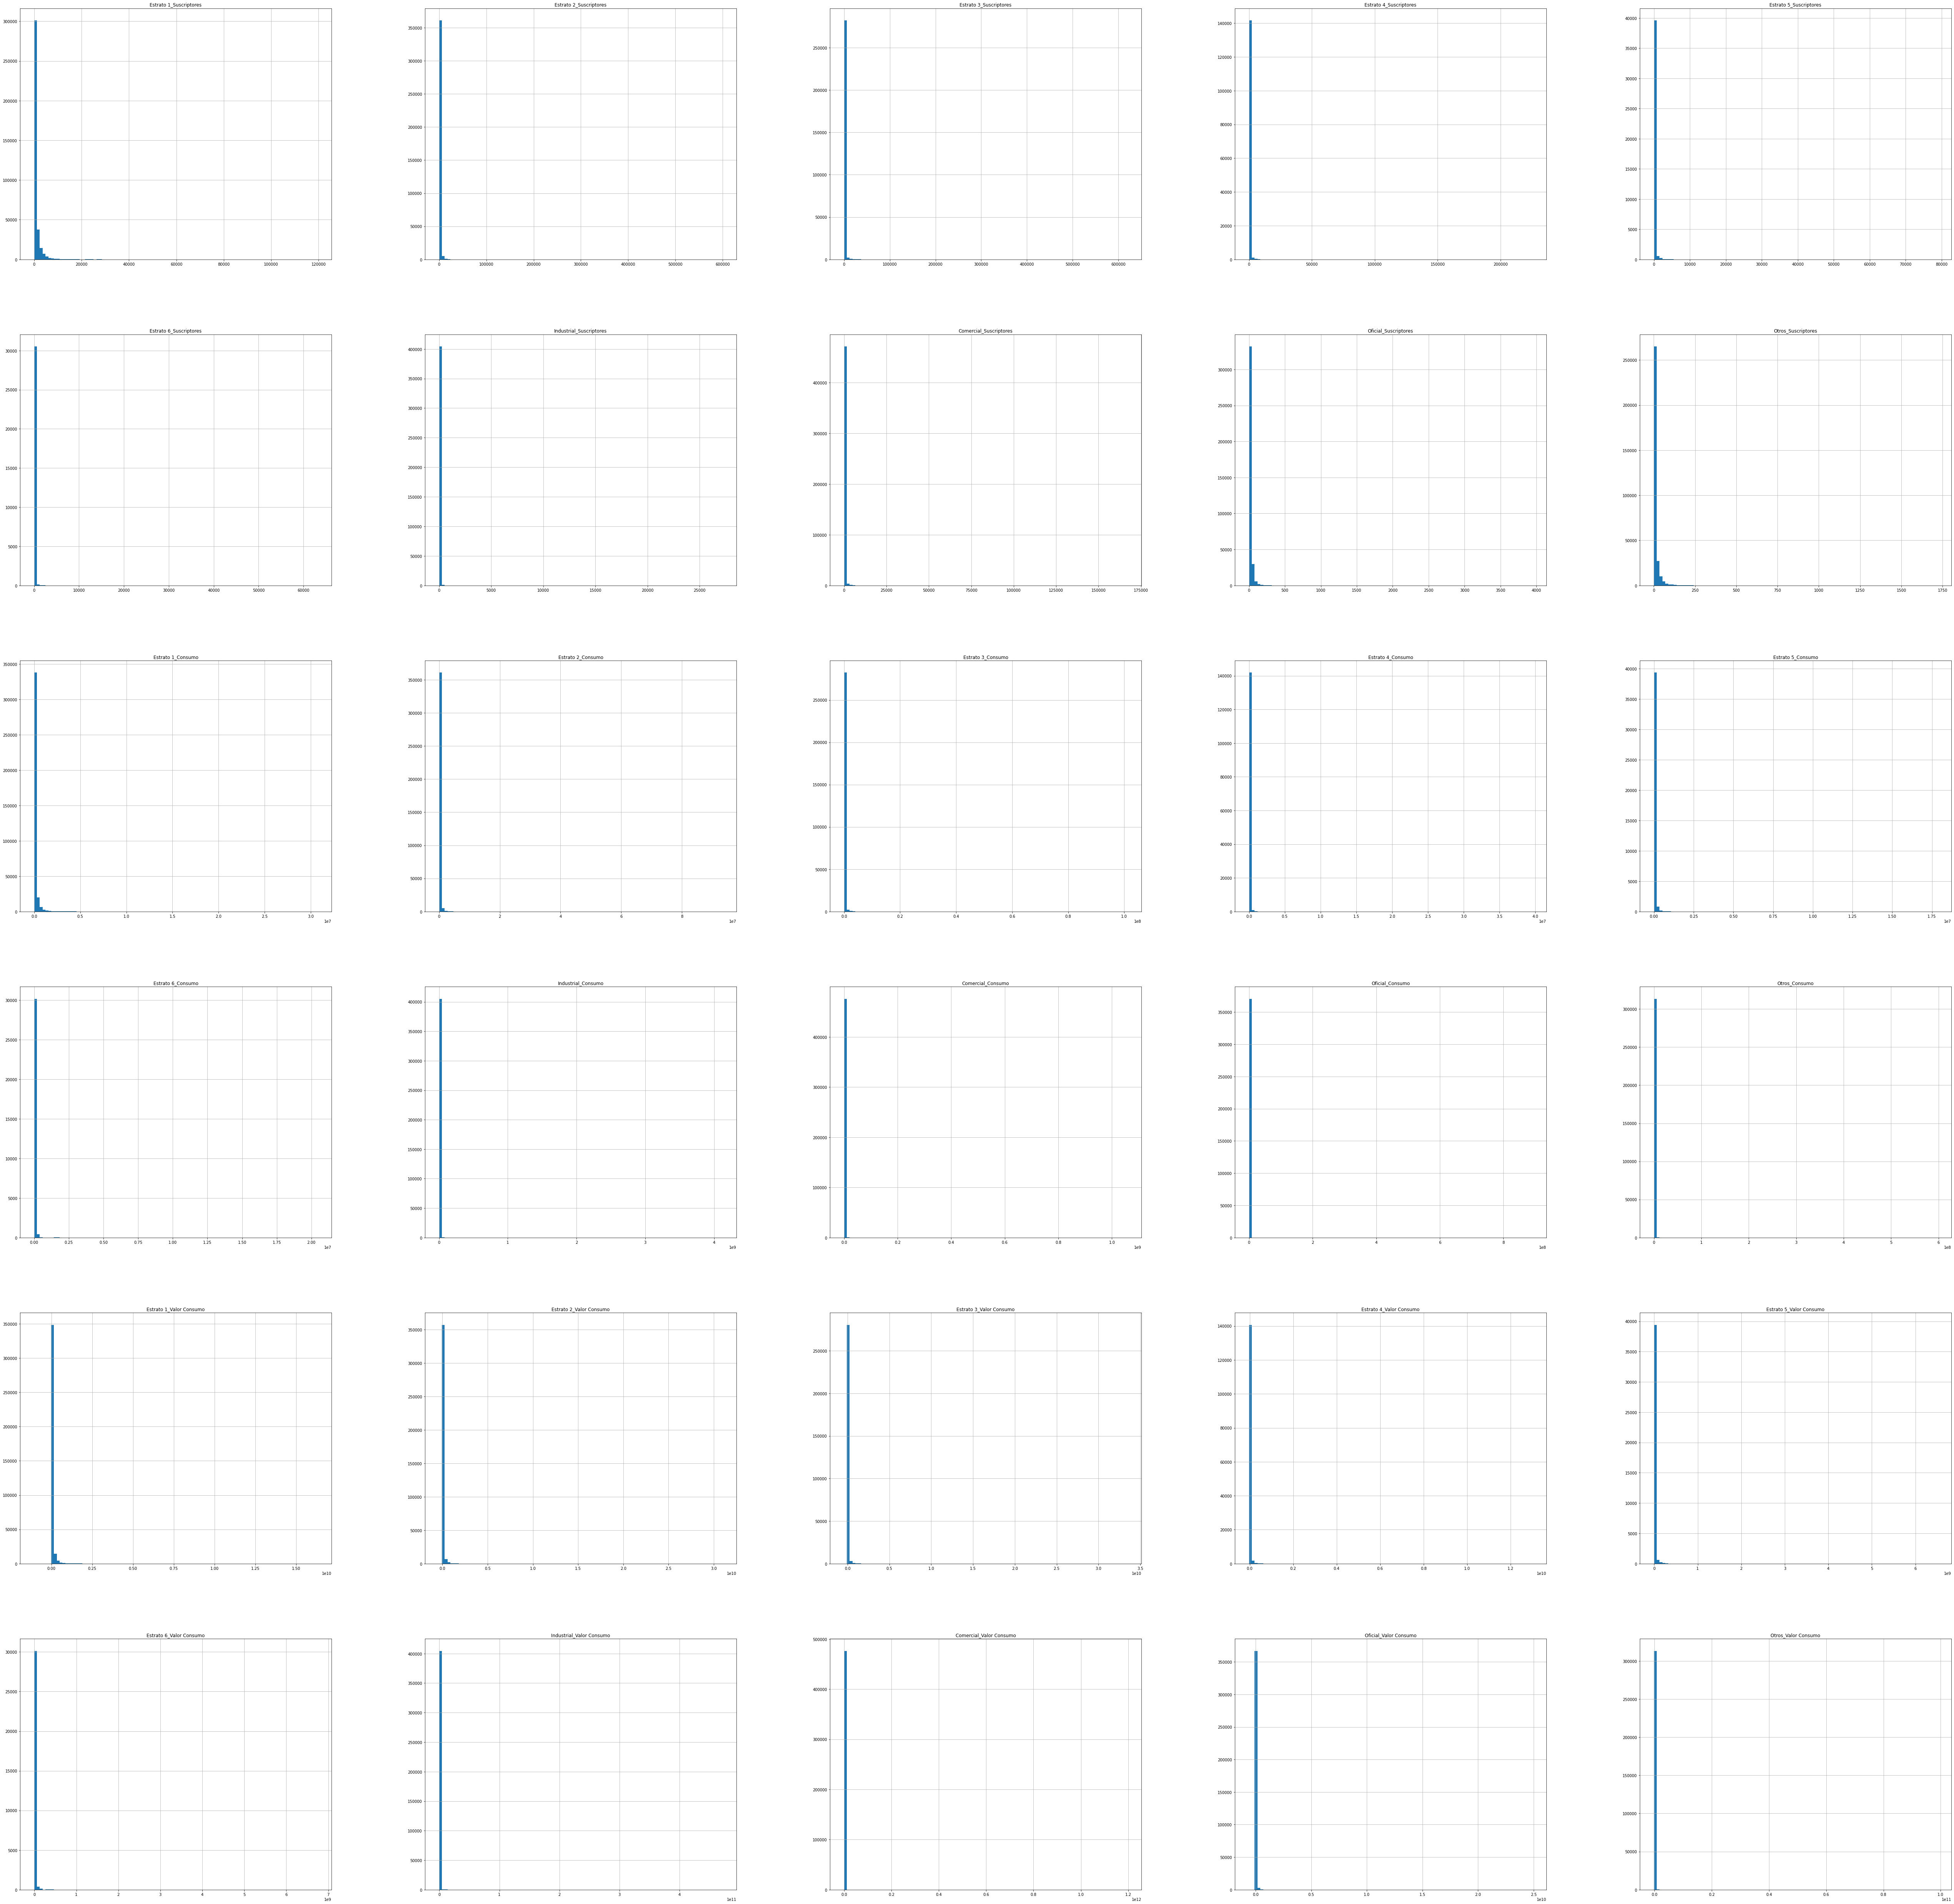

In [ ]:
import matplotlib.pyplot as plt
FinalM.hist(bins=100, figsize=(90,90))
plt.savefig ('grafico01.png')

In [ ]:
FinalM.corr(method="kendall" ).style.applymap(color_negative_red).applymap(color_significant)

,Estrato 1_Suscriptores,Estrato 2_Suscriptores,Estrato 3_Suscriptores,Estrato 4_Suscriptores,Estrato 5_Suscriptores,Estrato 6_Suscriptores,Industrial_Suscriptores,Comercial_Suscriptores,Oficial_Suscriptores,Otros_Suscriptores,Estrato 1_Consumo,Estrato 2_Consumo,Estrato 3_Consumo,Estrato 4_Consumo,Estrato 5_Consumo,Estrato 6_Consumo,Industrial_Consumo,Comercial_Consumo,Oficial_Consumo,Otros_Consumo,Estrato 1_Valor Consumo,Estrato 2_Valor Consumo,Estrato 3_Valor Consumo,Estrato 4_Valor Consumo,Estrato 5_Valor Consumo,Estrato 6_Valor Consumo,Industrial_Valor Consumo,Comercial_Valor Consumo,Oficial_Valor Consumo,Otros_Valor Consumo
Estrato 1_Suscriptores,1.000000,0.171979,0.157770,0.113015,0.123460,0.070594,0.091554,0.263731,0.260776,0.344872,0.804512,0.220550,0.190459,0.132245,0.112229,0.073883,0.143348,0.266929,0.285968,0.242651,0.805524,0.230889,0.199142,0.143248,0.123411,0.080731,0.147264,0.265339,0.282820,0.246182
Estrato 2_Suscriptores,0.171979,1.000000,0.401873,0.227105,0.169742,-0.028971,0.317599,0.454704,0.366345,0.242876,0.148563,0.780957,0.379866,0.200495,0.134925,-0.028070,0.263650,0.419637,0.339399,0.244994,0.149474,0.766250,0.385283,0.204815,0.139840,-0.026286,0.259888,0.405959,0.328711,0.244071
Estrato 3_Suscriptores,0.157770,0.401873,1.000000,0.384517,0.290298,0.085582,0.282192,0.484661,0.342088,0.139374,0.150744,0.386973,0.828030,0.320568,0.244431,0.069309,0.225787,0.412967,0.352043,0.208869,0.144329,0.368988,0.821802,0.317604,0.246081,0.070237,0.218075,0.391209,0.337124,0.203205
Estrato 4_Suscriptores,0.113015,0.227105,0.384517,1.000000,0.466864,0.322939,0.240368,0.269653,0.183126,0.169388,0.117841,0.235391,0.390325,0.713048,0.382066,0.233866,0.237429,0.298343,0.211641,0.168012,0.113586,0.223701,0.386910,0.713955,0.385369,0.235239,0.228045,0.281763,0.199179,0.168496
Estrato 5_Suscriptores,0.123460,0.169742,0.290298,0.466864,1.000000,0.473577,0.195323,0.206748,0.117509,0.183699,0.114336,0.173493,0.298585,0.422071,0.678729,0.431398,0.244062,0.268969,0.155123,0.136313,0.108587,0.164121,0.292125,0.414310,0.674854,0.425956,0.234225,0.249825,0.142426,0.139038
Estrato 6_Suscriptores,0.070594,-0.028971,0.085582,0.322939,0.473577,1.000000,0.165910,0.074190,-0.129503,0.088878,0.089675,0.012178,0.127385,0.347413,0.431910,0.606833,0.238149,0.187076,0.042227,0.161184,0.079824,0.000663,0.114754,0.338202,0.427550,0.604520,0.229606,0.170653,0.026640,0.153702
Industrial_Suscriptores,0.091554,0.317599,0.282192,0.240368,0.195323,0.165910,1.000000,0.362263,0.253866,0.137816,0.091617,0.314145,0.287741,0.233954,0.188955,0.165579,0.205876,0.268916,0.258170,0.127028,0.094978,0.315407,0.291888,0.239746,0.196226,0.169613,0.218651,0.267461,0.256583,0.131405
Comercial_Suscriptores,0.263731,0.454704,0.484661,0.269653,0.206748,0.074190,0.362263,1.000000,0.388670,0.268181,0.259271,0.496741,0.491225,0.262463,0.193643,0.083043,0.127046,0.397112,0.480865,0.316299,0.266221,0.509634,0.505211,0.272250,0.205454,0.091985,0.134014,0.405707,0.480761,0.325790
Oficial_Suscriptores,0.260776,0.366345,0.342088,0.183126,0.117509,-0.129503,0.253866,0.388670,1.000000,0.057097,0.211609,0.318535,0.319481,0.137274,0.136487,-0.095004,0.145495,0.251596,0.430987,0.153344,0.218199,0.329023,0.329615,0.148631,0.144295,-0.086817,0.153160,0.259721,0.441347,0.160699
Otros_Suscriptores,0.344872,0.242876,0.139374,0.169388,0.183699,0.088878,0.137816,0.268181,0.057097,1.000000,0.329468,0.266807,0.159107,0.166160,0.135085,0.026856,0.159688,0.264656,0.145213,0.254693,0.341434,0.281005,0.168792,0.172843,0.145424,0.032656,0.166078,0.268459,0.146157,0.272040


# Exportar Base de datos

# Calculos Adicionales

In [ ]:
len(FinalM)#.columns[6:16]
jkl=FinalM.iloc[5]
jkl

Age                                                              2016
Month                                                           Julio
Site                                                           Urbano
Departamento                                                   NARINO
Municipio                                                     IPIALES
Empresa                     A.S.C INGENIERIA SOCIEDAD ANONIMA SA ESP.
Estrato 1_Suscriptores                                            NaN
Estrato 2_Suscriptores                                            NaN
Estrato 3_Suscriptores                                            NaN
Estrato 4_Suscriptores                                             86
Estrato 5_Suscriptores                                            NaN
Estrato 6_Suscriptores                                            NaN
Industrial_Suscriptores                                             1
Comercial_Suscriptores                                              5
Oficial_Suscriptores

# Analisis por municipio

In [ ]:
V=FinalM#[FinalM["Municipio"]=="GUACARI"]
table = pd.pivot_table(V, index=['Age', 'Month', 'Site', 'Departamento', 'Municipio', 'Empresa'], values=['Estrato 1_Suscriptores', 'Estrato 2_Suscriptores',
       'Estrato 3_Suscriptores', 'Estrato 4_Suscriptores',
       'Estrato 5_Suscriptores', 'Estrato 6_Suscriptores',
       'Industrial_Suscriptores', 'Comercial_Suscriptores',
       'Oficial_Suscriptores', 'Otros_Suscriptores', 'Estrato 1_Consumo',
       'Estrato 2_Consumo', 'Estrato 3_Consumo', 'Estrato 4_Consumo',
       'Estrato 5_Consumo', 'Estrato 6_Consumo', 'Industrial_Consumo',
       'Comercial_Consumo', 'Oficial_Consumo', 'Otros_Consumo',
       'Estrato 1_Valor Consumo', 'Estrato 2_Valor Consumo',
       'Estrato 3_Valor Consumo', 'Estrato 4_Valor Consumo',
       'Estrato 5_Valor Consumo', 'Estrato 6_Valor Consumo',
       'Industrial_Valor Consumo', 'Comercial_Valor Consumo',
       'Oficial_Valor Consumo', 'Otros_Valor Consumo'],aggfunc=np.sum)
table2 = pd.pivot_table(V, index=['Age','Departamento', 'Municipio'], values=[ 'Comercial_Suscriptores',
       'Comercial_Consumo', 'Comercial_Valor Consumo'],aggfunc=np.sum)

In [ ]:
table2

Comercial_Consumo  Comercial_Suscriptores  \
Age  Departamento    Municipio                                               
2003 ANTIOQUIA       ABEJORRAL            565599.0                  4732.0   
                     ABRIAQUI              18658.0                   233.0   
                     ALEJANDRIA           141557.0                  1197.0   
                     AMAGA               1395142.0                  5143.0   
                     AMALFI               648824.0                  3277.0   
...                                            ...                     ...   
2020 VALLE DEL CAUCA VERSALLES             21841.0                    86.0   
                     VIJES                143598.0                    99.0   
                     YOTOCO               122140.0                   115.0   
                     YUMBO              25286742.0                  1465.0   
                     ZARZAL               508904.0                   562.0   

                                 Comercial_Valor Consumo  
Age  Departamento    Municipio                            
2003 ANTIOQUIA       ABEJORRAL              1.724846e+08  
                     ABRIAQUI               5.797530e+06  
                     ALEJANDRIA             4.395203e+07  
                     AMAGA                  4.262475e+08  
                     AMALFI                 2.016561e+08  
...                                                  ...  
2020 VALLE DEL CAUCA VERSALLES              1.232549e+07  
                     VIJES                  7.406224e+07  
                     YOTOCO                 6.349110e+07  
                     YUMBO                  7.539403e+10  
                     ZARZAL                 2.586443e+08  

[18948 rows x 3 columns]

In [ ]:
table2["TarifaMedia"]=table2['Comercial_Valor Consumo']/(table2['Comercial_Consumo'])

In [1]:
import bz2
f_in = open("DataSui_ele_com_096.csv", "rb")
f_out = open('DataSui_ele_com_096.csv.gz', "wb")
f_out.write(bz2.compress(f_in.read()))
f_out.close()
f_in.close()